# Model validation - BelgaLogos dataset with live logos
In the previous study we examined how a keypoint-matching classifier trained on **ideal** logos can
perform when applied to real-world photographs. Here I try to train a simmilar classifier on logos
taken directly from the BelgaLogos dataset. To build the training dataset, I looked through the matching images 
for each logo and found (by eye) one representative image per logo. I placed these (cropped) logo photographs in the `data/live_logos` directory. 

To see how this effects performance, we'll run an identical study as previously, just now with different template
logos.

In [1]:
import lib.load_data as ld
import lib.model as model
from lib.validation import study_matches
import cv2, os

# Read in the BelgaLogos dataset, filtered by acceptable bounding-boxes and 'OK' flag
metadata = ld.read_metadata()
metadata = ld.filter_by_boundingbox(metadata, 10, 800)
metadata = metadata[metadata.ok == True]

# Initialise a list of car and clothing logo brands, minus 'adidas-text'
car_logos      = ["Citroen", "Citroen-text", "Ferrari", "Kia", "Mercedes", "Peugeot"]
clothing_logos = ["Adidas", "Airness", "Gucci", "Nike", "Puma", "Puma-text", "Reebok", "Umbro"]

def validation_run(metadata, logo_set):
    """Perform a validation run over a list of logos, returning a results dictionary"""
    # Initialise a dictionary for results
    results_list = []
    for logo_name in logo_set:
        # Get the logo image - Here we are using the LIVE_LOGOS directory rather than the original
        logo_filename = os.path.join("data", "live_logos", logo_name.lower() + '.jpg')
        logo_image = cv2.imread(logo_filename)

        # Initialise model
        SIFT = cv2.xfeatures2d.SIFT_create()
        SIFTMatcher = model.KeypointMatcher(SIFT, cv2.NORM_L2SQR)
        SIFTMatcher.add_template(logo_name, logo_image)

        # Get target dataset
        dataset = metadata[(metadata.brand == logo_name)]

        #Perform study
        results_list.append(study_matches(dataset, SIFTMatcher))
    return results_list

Now let's perform the runs

In [2]:
%%time 
car_results = validation_run(metadata, car_logos) # Run over car logos

CPU times: user 10min 30s, sys: 35.6 s, total: 11min 6s
Wall time: 9min 11s


In [3]:
%%time 
clothing_results = validation_run(metadata, clothing_logos) # Run over clothing logos

CPU times: user 7min 56s, sys: 1min 7s, total: 9min 3s
Wall time: 6min 18s


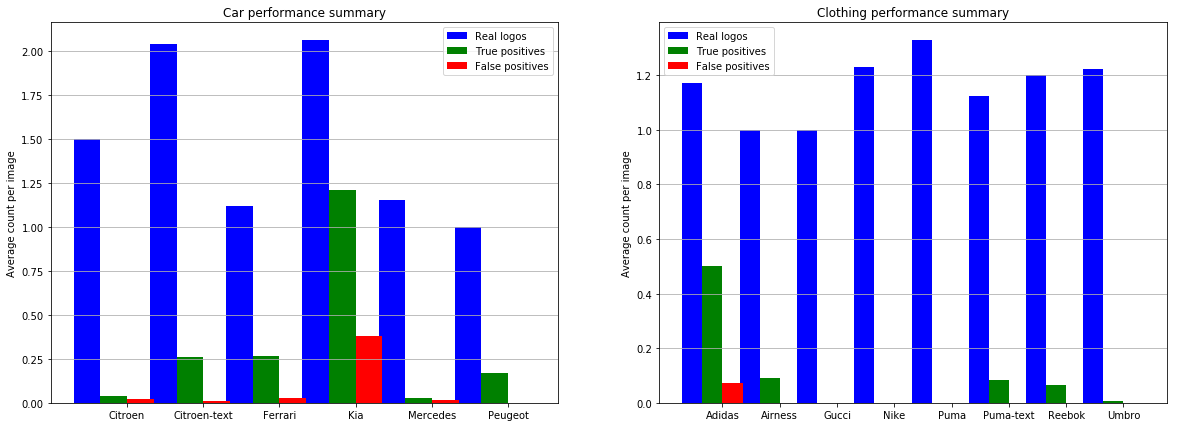

In [5]:
from lib.validation import validation_histogram
from matplotlib import pyplot as plt

# Plot validation histograms
fig, ax = plt.subplots(1, 2, figsize=(20,7))
validation_histogram(ax[0], car_results, car_logos, plot_label = "Car performance summary")
validation_histogram(ax[1], clothing_results, clothing_logos, plot_label = "Clothing performance summary")

Performance is significantly better in Ferrari and Adidas. With also successful matches in Puma-text and Reebok. However performance for Citroen-text deteriorates.
It's possible performance could be further enhanced by combining ideal logos with representative ones. Or by speeding up the matching and using a very large sample of template images.